# Introduction

Word Embeddings are used to represent words in a multi-dimensional vector form. A word <span class="math"><b>w<sub>i</sub></b></span> in vocabulary **V** is represented in the form of a vector of **n** dimensions. These vectors are generated by unsupervised training on a large corpus of words to gain the semantic similarities between them. 

## Downloading the required vector file

In [1]:
import sys

In [2]:
# # Make a directory to store the vector files
# !mkdir vectors

# # Now download the different files using these commands
# # This may take a while
# !cd check && curl -O http://magnitude.plasticity.ai/glove/light/glove.6B.50d.magnitude
# !cd check && curl -O http://magnitude.plasticity.ai/elmo/light/elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude

In [3]:
# # If you are not cloning the reporsitory from GitHub, the should run the next command as well.__pycache__
# !curl -O https://raw.githubusercontent.com/panditu2015/Word-Embeddings/master/utils.py

## Import some libraries

In [4]:
# Import some libraries

import pymagnitude as pym
import numpy as np
import utils as ut
import seaborn as sns
import pandas as pd

# Static Word Embeddings
Static WEs have fixed vector value for each word. They loose the contextual information

1. Google's Word2Vec
2. Stanford's GloVe
3. Facebook's fastText

## Stanford's GloVe

In [5]:
# Load the pre-trained GloVe vectors

glove_vectors = pym.Magnitude("./vectors/glove.6B.50d.magnitude")

For using other vectors, download the pre-trained vectors from `pymagnitude` [repo](https://github.com/plasticityai/magnitude#pre-converted-magnitude-formats-of-popular-embeddings-models) and put them in `./vectors` folder

In [6]:
# Print some info

print("Vector Name: {}\nTotal words: {}\nDimension: {}".format("GloVe", len(glove_vectors), glove_vectors.dim))

Vector Name: GloVe
Total words: 400000
Dimension: 50


In [7]:
# Take some word from the pre-trained vectors

for i, (key, vec) in enumerate(glove_vectors):
    if i == 1000:
        print("Index = {}\Word: {}\nVector Size: {}\nVector: {}".format(i, key, vec.shape, vec))
        break

Index = 1000\Word: themselves
Vector Size: (50,)
Vector: [ 0.1247761 -0.1702051  0.0657725 -0.2201602  0.1180495  0.0279988
 -0.0761774  0.0784935 -0.1657194 -0.0053017  0.0106485  0.0673911
 -0.0303226  0.0375656 -0.0097544  0.0768827  0.1337571 -0.0569862
  0.0465889 -0.1815695  0.0155663  0.0925343  0.1618002  0.0980913
  0.0130204 -0.2484847 -0.1305296 -0.0883126  0.1095464 -0.1930304
  0.5877811  0.2108729 -0.0689268 -0.2180214 -0.0507779  0.0960335
 -0.0435735  0.004392  -0.1213733 -0.0733296 -0.0414462 -0.1496207
  0.0810042  0.1631586  0.0655182  0.0094681 -0.1747871 -0.1080531
 -0.0270296 -0.1338361]


In [8]:
# Get the vector for some word
print(glove_vectors.query("dog"))

# Get the vector using the index
print(glove_vectors[1000])

[ 0.0226593 -0.0798284 -0.1185971 -0.0570476  0.1451633  0.1111435
 -0.2220234 -0.0826382  0.236803  -0.1168783  0.0008023  0.1088462
  0.132895   0.097286   0.0999352 -0.0378897  0.0370725  0.1881353
 -0.2465806 -0.1189367 -0.0781899  0.069176   0.1589116  0.1555255
  0.0936714 -0.3637471 -0.216198   0.0876196  0.0862343 -0.1406471
  0.3226194  0.0569879 -0.1270223  0.1330535 -0.0158492  0.0764052
  0.0269244 -0.0929118  0.0522803 -0.1531315 -0.0177436  0.0495426
 -0.1334261  0.1719807  0.2573463 -0.1057606  0.0086949 -0.1813857
  0.1473432  0.0792891]
('themselves', array([ 0.1247761, -0.1702051,  0.0657725, -0.2201602,  0.1180495,
        0.0279988, -0.0761774,  0.0784935, -0.1657194, -0.0053017,
        0.0106485,  0.0673911, -0.0303226,  0.0375656, -0.0097544,
        0.0768827,  0.1337571, -0.0569862,  0.0465889, -0.1815695,
        0.0155663,  0.0925343,  0.1618002,  0.0980913,  0.0130204,
       -0.2484847, -0.1305296, -0.0883126,  0.1095464, -0.1930304,
        0.5877811,  0.2

In [9]:
# Get the vectors for multiple words (or a document)

doc_vecs = glove_vectors.query(["I", "read", "a", "book"])
doc_vecs.shape

(4, 50)

In [10]:
# Get the vectors for multiple documents

mul_doc_vecs = glove_vectors.query([["I", "read", "a", "book"], ["I", "read", "a", "sports", "magazine"]])
mul_doc_vecs.shape

(2, 5, 50)

In [11]:
# Get the similarity between two words or documents

print("Similarity between \"Apple\" and \"Mango\": {}".format(glove_vectors.similarity("apple", "mango")))
print("Similarity between \"Apple\" and [\"Mango\", \"Orange\"]: {}".format(glove_vectors.similarity("apple", ["mango", "orange"])))
print("Most similar to \"Cat\" from [\"Dog\", \"Television\", \"Laptop\"]: {}".format(glove_vectors.most_similar_to_given("cat", ["dog", "television", "laptop"])))
print("Top 5 most similar to \"Cat\": {}".format(glove_vectors.most_similar("cat", topn = 5)))

Similarity between "Apple" and "Mango": 0.6127085089683533
Similarity between "Apple" and ["Mango", "Orange"]: [0.6127085, 0.5388041]
Most similar to "Cat" from ["Dog", "Television", "Laptop"]: dog
Top 5 most similar to "Cat": [('dog', 0.9218005), ('rabbit', 0.8487821), ('monkey', 0.8041082), ('rat', 0.78919643), ('cats', 0.78652704)]


In [12]:
# Similarity between two documents

doc1, doc2 = glove_vectors.query(["I", "read", "a", "book"]), glove_vectors.query(["I", "read", "a", "sports", "magazine"])
print("Similarity between\n\"I read a book\" and \"I read a sports magazine\": {}".format(ut.similarity_between_docs(doc1, doc2, is_1d=False)))

Similarity between
"I read a book" and "I read a sports magazine": 0.9435125589370728


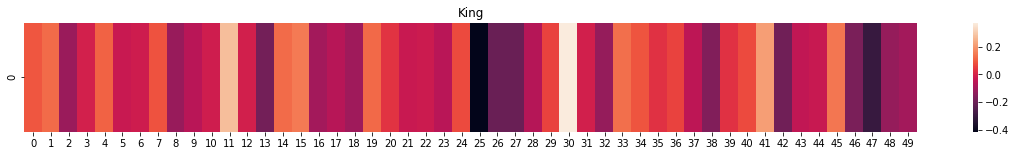

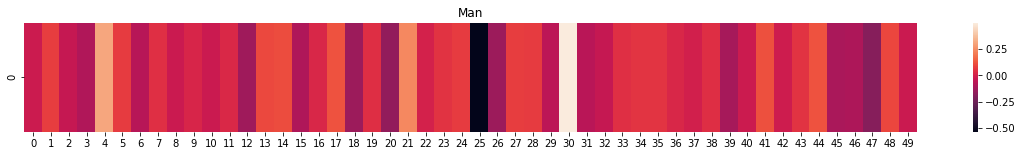

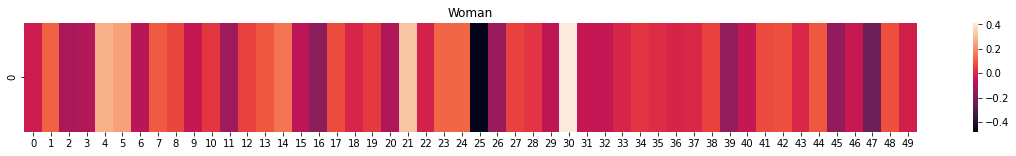

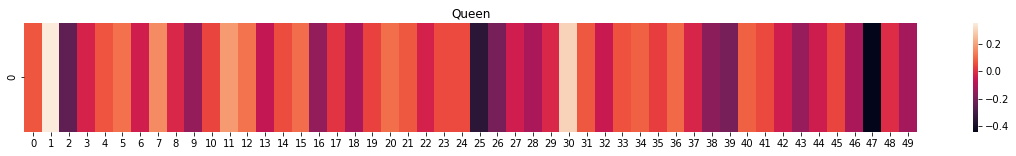

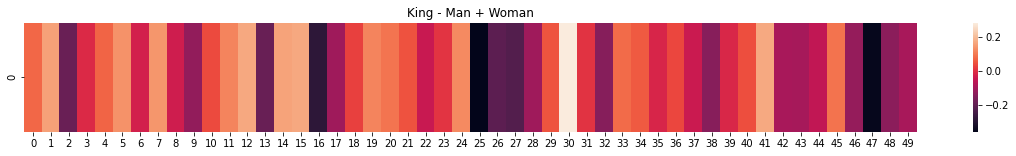

Similarity between
"King - Man + Woman" and "Queen": 0.8523603081703186


In [13]:
# Plot some vectors using heatmap

ut.plot_1d_heatmap(glove_vectors.query("king"), "King")
ut.plot_1d_heatmap(glove_vectors.query("man"), "Man")
ut.plot_1d_heatmap(glove_vectors.query("woman"), "Woman")
ut.plot_1d_heatmap(glove_vectors.query("queen"), "Queen")
ut.plot_1d_heatmap(glove_vectors.query("king") - glove_vectors.query("man") + glove_vectors.query("woman"), "King - Man + Woman")

print("Similarity between\n\"King - Man + Woman\" and \"Queen\": {}".format(ut.similarity_between_docs(glove_vectors.query("king") + glove_vectors.query("woman") - glove_vectors.query("man"), glove_vectors.query("queen"), is_1d=True)))

# Contextual Word Embeddings
These algoirtms also take the context of the word in some sentence while generating the Embeddings

1. AllenAI's ELMo
2. Google's BERT

## AllenAI's ELMo

In [59]:
elmo_vecs = pym.Magnitude('./vectors/elmo_2x1024_128_2048cnn_1xhighway_weights.magnitude')

ELMo generates embedding of a word based on its context. So we need to provide a full sentence in order to get the embedding of some word.

In [60]:
# Returns: an array of size (9 (number of words) x 768 (3 ELMo components concatenated))
sen1  = elmo_vecs.query(["yes", "they", "are", "right"])
sen2 = elmo_vecs.query(["go", "to", "your", "right"])

c:\users\ashis\appdata\local\programs\python\python37\lib\site-packages\pymagnitude/third_party\allennlp\nn\util.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  index_range = sequence_lengths.new_tensor(torch.arange(0, len(sequence_lengths)))


In [61]:
right1 = sen1[-1]
right2 = sen2[-1]
print("right from sentence 1: {}\tright from sentence 2: {}".format(right1.shape, right2.shape))

right from sentence 1: (768,)	right from sentence 2: (768,)


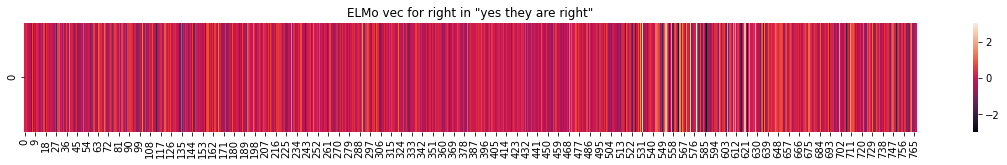

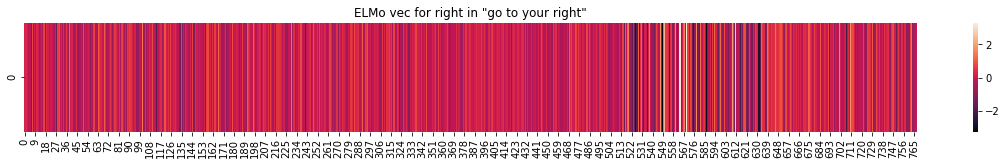

In [62]:
ut.plot_1d_heatmap(right1, name="ELMo vec for right in \"yes they are right\"")
ut.plot_1d_heatmap(right2, name="ELMo vec for right in \"go to your right\"")

In [63]:
print("Simialrity between \"right\" from sentence 1 & 2:\t{}".format(ut.similarity_between_docs(right1, right2, is_1d=True)))
print("Simialrity between \"right\" from sentence 1 only:\t{}".format(ut.similarity_between_docs(right1, right1, is_1d=True)))
print("Simialrity between \"right\" from sentence 2 only:\t{}".format(ut.similarity_between_docs(right2, right2, is_1d=True)))

Simialrity between "right" from sentence 1 & 2:	0.7283329963684082
Simialrity between "right" from sentence 1 only:	0.9999998807907104
Simialrity between "right" from sentence 2 only:	1.0


## Google's BERT
Since `pymagnitude` doesn't have support for BERT yet, we'll use the [huggingface's](https://huggingface.co/) `transfomers` library for this.

In [64]:
import transformers
import torch

In [65]:
# dowonload the pre-trained bert weights and tokenizer
# this may take a while for first time
model_class, tokenizer_class, pretrained_weights = (transformers.BertModel, transformers.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [66]:
# tokenize a sentence and encode it into token_ids
tokenized1 = tokenizer.encode("yes they are right", add_special_tokens=False)
tokenized2 = tokenizer.encode("go to your right", add_special_tokens=False)
print(tokenized1, tokenized2)

# you can also get the full sentence using the token_ids
print(tokenizer.decode(tokenized1))
print(tokenizer.decode(tokenized2))

[2748, 2027, 2024, 2157] [2175, 2000, 2115, 2157]
yes they are right
go to your right


In [67]:
input_ids = torch.tensor([tokenized1, tokenized2])
model.eval()
with torch.no_grad():
    outputs = model(input_ids)
    last_hidden_states = outputs[0]

In [68]:
right1_bert = (last_hidden_states[0][-1]).numpy()
right2_bert = (last_hidden_states[1][-1]).numpy()

In [69]:
print(right1_bert.shape, right2_bert.shape)

(768,) (768,)


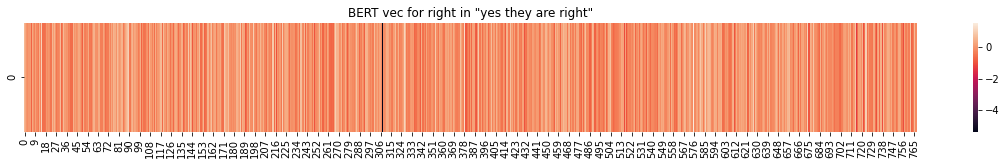

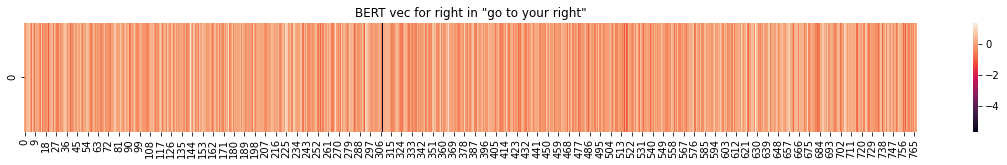

In [70]:
ut.plot_1d_heatmap(right1_bert, name="BERT vec for right in \"yes they are right\"")
ut.plot_1d_heatmap(right2_bert, name="BERT vec for right in \"go to your right\"")

In [71]:
print("Simialrity between \"right\" from sentence 1 & 2 using BERT:\t{}".format(ut.similarity_between_docs(right1_bert, right2_bert, is_1d=True)))
print("Simialrity between \"right\" from sentence 1 only using BERT:\t{}".format(ut.similarity_between_docs(right1_bert, right1_bert, is_1d=True)))
print("Simialrity between \"right\" from sentence 2 only using BERT:\t{}".format(ut.similarity_between_docs(right2_bert, right2_bert, is_1d=True)))

Simialrity between "right" from sentence 1 & 2 using BERT:	0.605478048324585
Simialrity between "right" from sentence 1 only using BERT:	0.9999997019767761
Simialrity between "right" from sentence 2 only using BERT:	1.000000238418579


# Text Classification 
Let's apply different embeddings for a simple **Text Classification** problem

In [72]:
# # Download the data for classification in a directory
# !mkdir data
# !cd data && curl -O https://raw.githubusercontent.com/clairett/pytorch-sentiment-classification/master/data/SST2/train.tsv

## Load the data

In [179]:
df = pd.read_csv('./data/train.tsv', delimiter='\t', names=["text", "label"])
print(df.shape)
df = df[:200]
df.head(5)

(6920, 2)


,text,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


## Embedding the data using GloVe

In [180]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [181]:
def gen_embs(row):
    row = row['text']
    
    tokens = nltk.word_tokenize(row)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    
    stemming = PorterStemmer()
    tokens_stemmed = [stemming.stem(word) for word in token_words]
    
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in tokens_stemmed if not w in stops]
    
    vecs = []
    for w in meaningful_words:
        w_vec = glove_vectors.query(w)
        vecs.append(w_vec)
    vec_arr = np.array(vecs)
    vec_final = np.mean(vec_arr, axis=0, dtype="float32")

    return vec_final

In [182]:
df["glove_vecs"] = df.apply(gen_emb, axis=1)

In [183]:
glove_embs = (torch.tensor(df["glove_vecs"])).numpy()

In [184]:
glove_embs.shape

(200, 50)

## Embedding the data using ELMo

In [185]:
elmo_embs = df["text"].apply((lambda x: elmo_vecs.query(x)))

In [186]:
# type(elmo_embs[0])

In [187]:
elmo_embs = (torch.tensor(elmo_embs)).numpy()
elmo_embs.shape

(200, 768)

## Embedding the data using BERT

In [188]:
bert_tokenized = df["text"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [189]:
max_len = 0
for i in bert_tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in bert_tokenized.values])
print(np.array(padded).shape)

(200, 54)


In [190]:
attention_mask = np.where(padded != 0, 1, 0)
print(attention_mask.shape)

(200, 54)


In [191]:
input_ids = torch.tensor(padded).to(torch.int64)
attention_mask = torch.tensor(attention_mask)
model.eval()
model.to("cpu")

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    last_hidden_states = outputs[0]
bert_embs = (last_hidden_states[:, 0, :]).numpy()

In [192]:
bert_embs.shape

(200, 768)

## Prepare the `features` and `labels` for train and test

In [193]:
labels = df["label"]

In [194]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(glove_embs, labels, test_size=0.33, random_state=42, stratify=labels)
X_train_elmo, X_test_elmo, y_train_elmo, y_test_elmo = train_test_split(elmo_embs, labels, test_size=0.33, random_state=42, stratify=labels)
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(bert_embs, labels, test_size=0.33, random_state=42, stratify=labels)

In [195]:
# train a LogisiticRegression model on train data

from sklearn.linear_model import LogisticRegression

lr_clf_glove = LogisticRegression()
lr_clf_glove.fit(X_train_glove, y_train_glove)

lr_clf_elmo = LogisticRegression()
lr_clf_elmo.fit(X_train_elmo, y_train_elmo)

lr_clf_bert = LogisticRegression()
lr_clf_bert.fit(X_train_bert, y_train_bert)

c:\users\ashis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\ashis\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

LogisticRegression()

In [196]:
y_pred_glove = lr_clf_glove.predict(X_test_glove)
y_pred_elmo = lr_clf_elmo.predict(X_test_elmo)
y_pred_bert = lr_clf_bert.predict(X_test_bert)

In [197]:
from sklearn.metrics import accuracy_score, f1_score

print("GloVe\tAccuracy: {}\tMacro F1: {}".format(accuracy_score(y_pred_glove, y_test_glove), f1_score(y_pred_glove, y_test_glove, average="macro")))
print("ELMo\tAccuracy: {}\tMacro F1: {}".format(accuracy_score(y_pred_elmo, y_test_elmo), f1_score(y_pred_elmo, y_test_elmo, average="macro")))
print("BERT\tAccuracy: {}\tMacro F1: {}".format(accuracy_score(y_pred_bert, y_test_bert), f1_score(y_pred_bert, y_test_bert, average="macro")))

GloVe	Accuracy: 0.5454545454545454	Macro F1: 0.35294117647058826
ELMo	Accuracy: 0.5454545454545454	Macro F1: 0.5170731707317072
BERT	Accuracy: 0.7575757575757576	Macro F1: 0.7566820276497697
